In [ ]:
# Import JAX and other libraries
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of data points and the noise level
n = 100 # number of data points
noise = 0.1 # noise level

# Generate the feature x randomly from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, n)

# Generate the target y as a linear function of x plus some noise
a = 2 # intercept
b = 3 # slope
y = a + b * x + noise * np.random.randn(n)

data = np.c_[x, y] # concatenate x and y into a 2D array

In [ ]:
x = data[:, 0] # the first column is the feature x
y = data[:, 1] # the second column is the target y

In [ ]:
# Define the model as a linear function y = a + b * x
def model(params, x):
  a, b = params
  return a + b * x

In [ ]:
# Define the loss function as the mean squared error between prediction and target
def loss(params, x, y):
  pred = model(params, x) # get the prediction
  return jnp.mean((pred - y) ** 2) # return the mean squared error

In [ ]:
# Initialize the parameters randomly
rng = jax.random.PRNGKey(0)
params = jax.random.normal(rng, (2,))

# Define the gradient function using jax.grad
grad_loss = jax.grad(loss)

In [ ]:
# Define the learning rate and the number of iterations
learning_rate = 0.05
num_iter = 500
optimal_params = []
minimum_loss = 99999
loss_values, params_values = [], []

# Perform gradient descent to minimize the loss
for i in range(num_iter):
  grad = grad_loss(params, x, y)
  params = params - learning_rate * grad
  # print(f'Iteration {i+1}, Loss: {loss(params, x, y):.4f}, Parameters: {params}')
  loss_values.append(loss(params, x, y))
  params_values.append(params)
  if loss(params,x,y) <= minimum_loss:
    minimum_loss = loss(params,x,y)
    optimal_params = params

print(f'\nLoss minimum: {minimum_loss:.4f}, with the parameters is: {optimal_params}')


Loss minimum: 0.0100, with the parameters is: [2.032187  2.9740167]


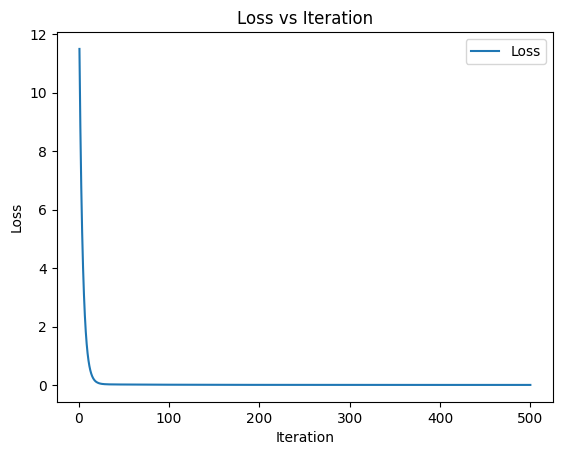

In [ ]:
# Plot the loss values versus the iteration number
plt.plot(range(1, num_iter + 1), loss_values, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.legend()
plt.show()

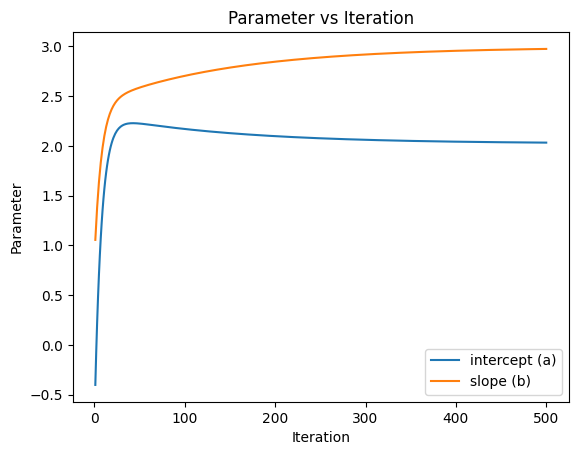

In [ ]:
# Plot the parameters values versus the iteration number
plt.plot(range(1, num_iter + 1), [p[0] for p in params_values], label='intercept (a)')
plt.plot(range(1, num_iter + 1), [p[1] for p in params_values], label='slope (b)')
plt.xlabel('Iteration')
plt.ylabel('Parameter')
plt.title('Parameter vs Iteration')
plt.legend()
plt.show()

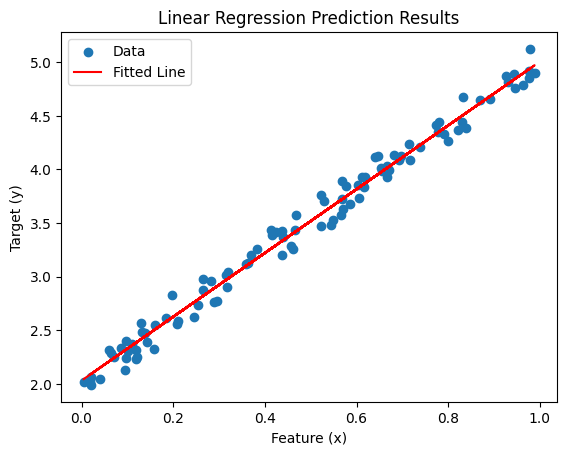

In [ ]:
# Plot the data and the fitted line
plt.scatter(x, y, label='Data') # plot the data points
plt.plot(x, model(params, x), color='red', label='Fitted Line') # plot the fitted line
plt.xlabel('Feature (x)') # label the x-axis
plt.ylabel('Target (y)') # label the y-axis
plt.title('Linear Regression Prediction Results')
plt.legend() # show the legend
plt.show() # show the plot

## Implementasi solusi analitik untuk masalah regresi linear

In [ ]:
X = np.c_[np.ones(x.shape), x] # represent the intercept term
# Compute analytic solution for the parameters using the normal equation
params = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
print(f'Parameters: {params}')

Parameters: [2.02221511 2.9936935 ]


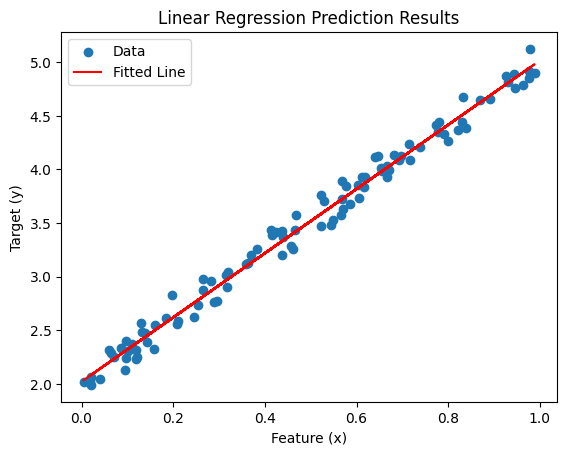

In [ ]:
# Plot the data and the fitted line
plt.scatter(x, y, label='Data') # plot the data points
plt.plot(x, X @ params, color='red', label='Fitted Line') # plot the fitted line
plt.xlabel('Feature (x)') # label the x-axis
plt.ylabel('Target (y)') # label the y-axis
plt.title('Linear Regression Prediction Results')
plt.legend() # show the legend
plt.show() # show the plot

Parameters: 2.022215107744723, 2.993693502140203


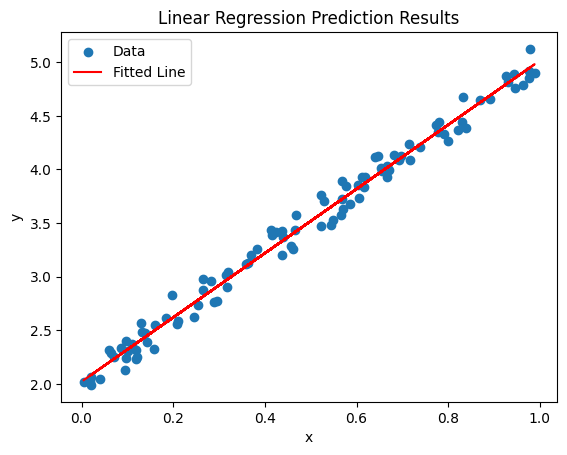

In [ ]:
# Import ScikitLearn and other libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# # Set the random seed for reproducibility
# np.random.seed(0)

# # Define the number of data points and the noise level
# n = 100 # number of data points
# noise = 0.1 # noise level

# # Generate the feature x randomly from a uniform distribution between 0 and 1
# x = np.random.uniform(0, 1, n)

# # Generate the target y as a linear function of x plus some noise
# a = 2 # intercept
# b = 3 # slope
# y = a + b * x + noise * np.random.randn(n)

# Reshape x to a 2D array with one column
x = x.reshape(-1, 1)

# Create a LinearRegression object and fit it to the data
model = LinearRegression()
model.fit(x, y)

# Print the parameters
print(f'Parameters: {model.intercept_}, {model.coef_[0]}')

# Plot the data and the fitted line
plt.scatter(x, y, label='Data') # plot the data points
plt.plot(x, model.predict(x), color='red', label='Fitted Line') # plot the fitted line
plt.xlabel('x') # label the x-axis
plt.ylabel('y') # label the y-axis
plt.title('Linear Regression Prediction Results')
plt.legend() # show the legend
plt.show() # show the plot

Parameters: 2.0265588760375977, 2.9885597229003906
4/4 [==============================] - 0s 16ms/step


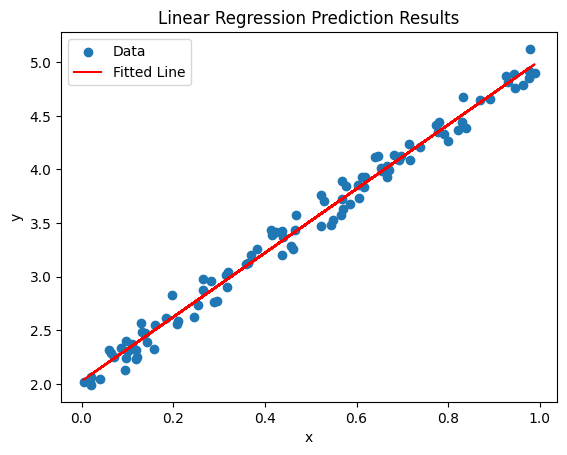

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# # Set the random seed for reproducibility
# tf.random.set_seed(0)

# # Define the number of data points and the noise level
# n = 100  # number of data points
# noise = 0.1  # noise level

# # Generate the feature x randomly from a uniform distribution between 0 and 1
# x = tf.random.uniform(shape=(n, 1))

# # Generate the target y as a linear function of x plus some noise
# a = 2  # intercept
# b = 3  # slope
# y = a + b * x + noise * tf.random.normal(shape=(n, 1))

# Create a linear regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=1000, verbose=0)

# Print the learned parameters
weights, bias = model.layers[0].get_weights()
print(f'Parameters: {bias[0]}, {weights[0][0]}')

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')  # plot the data points
plt.plot(x, model.predict(x), color='red', label='Fitted Line')  # plot the fitted line
plt.xlabel('x')  # label the x-axis
plt.ylabel('y')  # label the y-axis
plt.title('Linear Regression Prediction Results')
plt.legend()  # show the legend
plt.show()  # show the plot

<ipython-input-88-5dfd56c8309e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
<ipython-input-88-5dfd56c8309e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


Parameters: 2.0227606296539307, 2.992617130279541


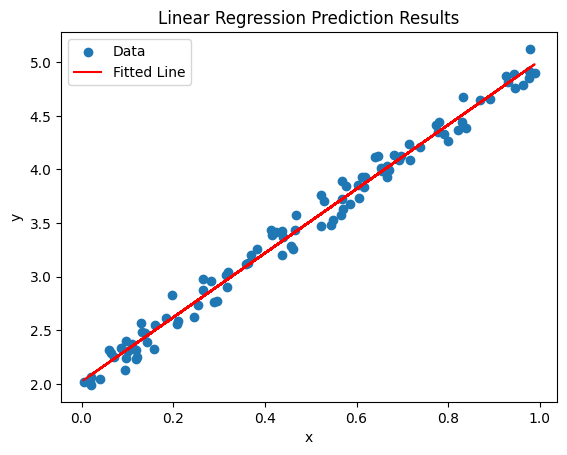

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Create a linear regression model using PyTorch
model = nn.Linear(1, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x.unsqueeze(1))  # Use unsqueeze to convert x to 2D tensor
    loss = criterion(outputs, y.unsqueeze(1))  # Use unsqueeze to convert y to 2D tensor

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the learned parameters
print(f'Parameters: {model.bias.item()}, {model.weight.item()}')

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')  # plot the data points
plt.plot(x, model(x.unsqueeze(1)).detach().numpy(), color='red', label='Fitted Line')  # plot the fitted line
plt.xlabel('x')  # label the x-axis
plt.ylabel('y')  # label the y-axis
plt.title('Linear Regression Prediction Results')
plt.legend()  # show the legend
plt.show()  # show the plot